'choose which channel to be shown, Click clear to reselect '

Button(description='CH1', style=ButtonStyle())

Output()

Button(description='CH2', style=ButtonStyle())

Output()

Button(description='CH3', style=ButtonStyle())

Output()

Button(description='CH4', style=ButtonStyle())

Output()

Button(description='Clear the selection', style=ButtonStyle())

Output()

Button(description='Next', style=ButtonStyle())

Output()

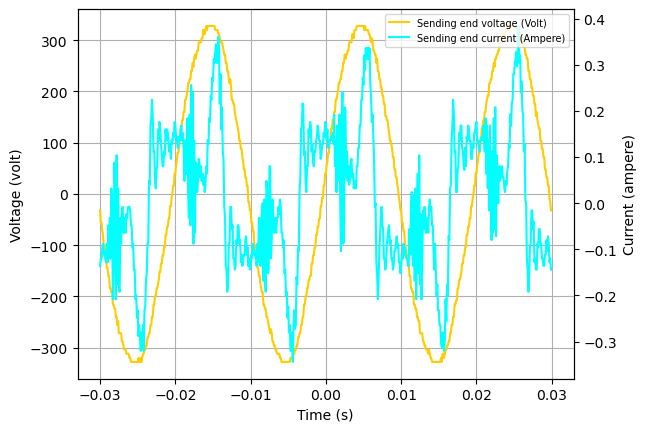

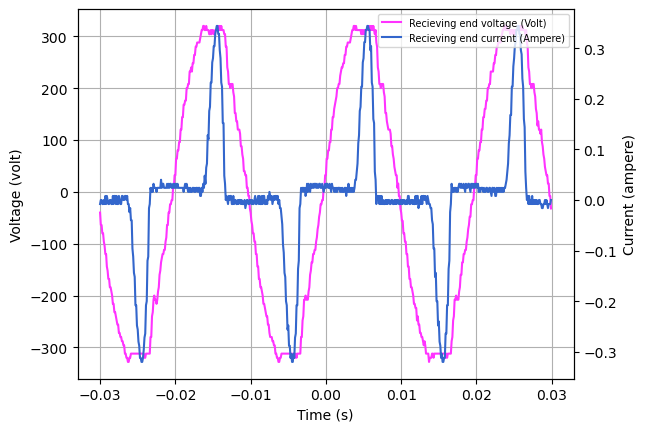

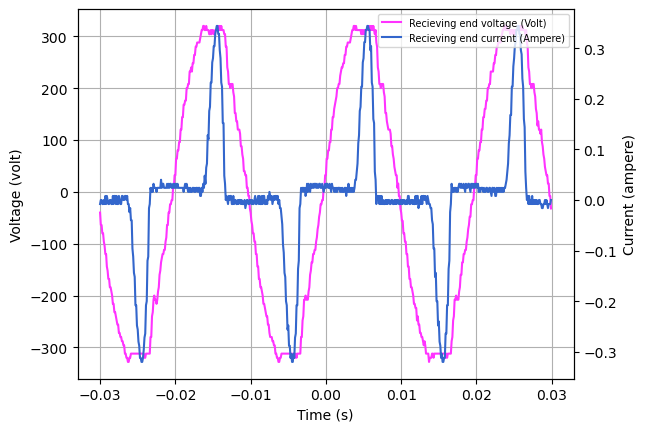

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt

from IPython.display import display
import ipywidgets as widgets
file_name="l_1.csv"
button1 = widgets.Button(description="CH1")
button2 = widgets.Button(description="CH2")
button3 = widgets.Button(description="CH3")
button4 = widgets.Button(description="CH4")
button5 = widgets.Button(description="Clear the selection")
button6 = widgets.Button(description="Next")


output1 = widgets.Output()
output2 = widgets.Output()
output3 = widgets.Output()
output4 = widgets.Output()
output5 = widgets.Output()
output6 = widgets.Output()

display("choose which channel to be shown, Click clear to reselect ")

display(button1,output1)
display(button2,output2)
display(button3,output3)
display(button4,output4)
display(button5,output5)
display(button6,output6)
aa = 0
bb = 0
cc = 0
dd = 0
    
def b1(b):
    with output1:
        #output1.clear_output()
        print("CH1 is selected")
    global aa
    aa = 1

def b2(b):
    with output2:
        #output2.clear_output()
        print("CH2 is selected")
    global bb
    bb = 1

def b3(b):
    with output3:
        #output3.clear_output()
        print("CH3 is selected")
    global cc
    cc = 1

def b4(b):
    with output4:
        #output4.clear_output()
        print("CH4 is selected")
    
    global dd
    dd = 1

def b5(b):
    with output1:
        output1.clear_output()
    with output2:
        output2.clear_output()
    with output3:
        output3.clear_output()
    with output4:
        output4.clear_output()
    global aa,bb,cc,dd
    aa = 0
    bb = 0
    cc = 0
    dd = 0
    
def b6(b):
    
    counter=0
    time=[]
    ch1=[]
    ch2=[]
    ch3=[]
    ch4=[]
    legend_ch=[]
    line_ch=[]
    dff= pd.read_csv(file_name,header= None,sep='   *   *',engine='python')
    while counter<600:
        row=dff[0][counter+2]
        row_split=list(row.split(","))
        time.append(float(row_split[0]))
        counter+=1
    counter=0
    while counter<600:
        row=dff[0][counter+2]
        row_split=list(row.split(","))
        ch1.append(float(row_split[1]))
        counter+=1
    counter=0
    while counter<600:
        row=dff[0][counter+2]
        row_split=list(row.split(","))
        ch2.append(float(row_split[2]))
        counter+=1
    counter=0
    while counter<600:
        row=dff[0][counter+2]
        row_split=list(row.split(","))
        ch3.append(float(row_split[3]))
        counter+=1
    counter=0
    while counter<600:
        row=dff[0][counter+2]
        row_split=list(row.split(","))
        ch4.append(float(row_split[4]))
        counter+=1

    if (aa or cc) and (not bb and not dd):
        ax1 = pt.subplot()
        pt.ylabel("Voltage (volt)")
        pt.xlabel("Time (s)")
        #ax1.set_ylim(-500,500)
        pt.grid(None)
        
    elif (bb or dd) and (not aa and not cc):
        ax2 = pt.subplot()
        #ax2.set_ylim(-0.6,0.6)
        pt.ylabel("Current (ampere)")
        pt.xlabel("Time (s)")
        pt.grid(None)
    else:
        ax1 = pt.subplot()
        ax2 = ax1.twinx()
        ax1.set_xlabel("Time (s)")
        ax1.set_ylabel("Voltage (volt)")
        ax2.set_ylabel("Current (ampere)")
        #ax1.set_ylim(-600,600)
        #ax2.set_ylim(-0.6,0.6)
        ax1.grid(None)
    if aa ==1:
        l1, = ax1.plot(time,ch1, color='#FFCC00') 
        legend_ch.append("Sending end voltage (Volt)")
        line_ch.append(l1)
    if bb==1:
        l2, = ax2.plot(time,ch2,color='#00FFFF') 
        legend_ch.append("Sending end current (Ampere)")
        line_ch.append(l2)
    if cc==1:
        l3, = ax1.plot(time,ch3, color='#FF33FF') 
        legend_ch.append("Recieving end voltage (Volt)")
        line_ch.append(l3)
    if dd==1:   
        l4, = ax2.plot(time,ch4,color='#3366CC') 
        legend_ch.append("Recieving end current (Ampere)")
        line_ch.append(l4)
    
    pt.legend(line_ch,legend_ch,loc='upper right',fontsize='7')



    
    
button1.on_click(b1)
button2.on_click(b2)
button3.on_click(b3)
button4.on_click(b4)
button5.on_click(b5)
button6.on_click(b6)

#aa=1
#bb=1
#cc=1
#dd=1
